In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

### Step 1: Import Libraries

We import essential libraries for numerical computation (NumPy), visualization (Matplotlib, Seaborn), and statistical testing (SciPy).

## Model Drift Detection

This notebook demonstrates **Model Drift** detection using statistical tests. Model drift occurs when the distribution of input features in production differs from the training data, potentially affecting model performance.

In [2]:
# 1. Training Data (Baseline)
np.random.seed(42)
train_data = np.random.normal(loc=0, scale=1, size=1000)

### Step 2: Generate Training Data

We create a baseline training dataset with a normal distribution (mean=0, std=1). This represents data the model was trained on.

In [3]:
# 2. Production Data (Drifted)
prod_data = np.random.normal(loc=0.5, scale=1, size=1000)

### Step 3: Generate Production Data (Drifted)

We create production data with a shifted mean (0.5 instead of 0), simulating a real-world scenario where data distribution has changed.

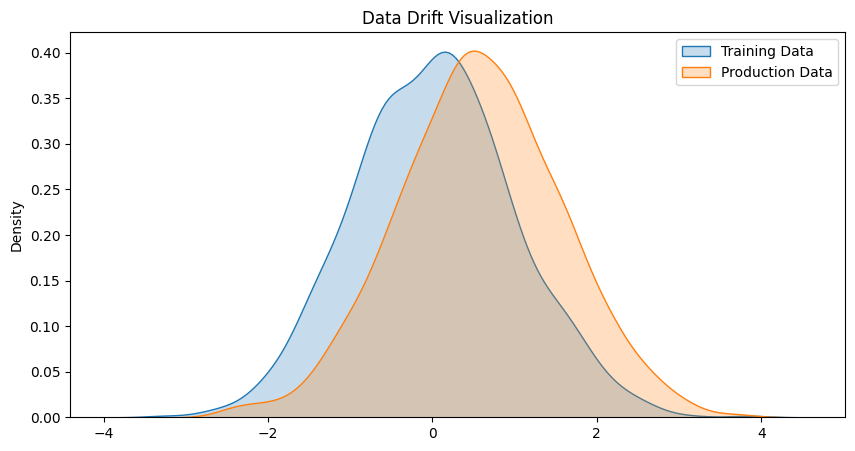

In [4]:
# 3. Visualize Distributions
plt.figure(figsize=(10,5))
sns.kdeplot(train_data, label="Training Data", fill=True)
sns.kdeplot(prod_data, label="Production Data", fill=True)
plt.title("Data Drift Visualization")
plt.legend()
plt.show()

### Step 4: Visualize Distributions

We plot kernel density estimates (KDE) of both distributions to visually identify the shift in data distribution. The overlapping areas show differences in the feature distributions.

In [5]:
# 4. KS Test
statistic, p_value = ks_2samp(train_data, prod_data)
print(f"KS Statistic: {statistic:.4f}")
print(f"P-Value: {p_value:.4e}")

KS Statistic: 0.2420
P-Value: 4.2252e-26


### Step 5: Kolmogorov-Smirnov (KS) Test

The KS test is a non-parametric statistical test that quantifies the maximum difference between two cumulative distributions. A lower p-value (< 0.05) indicates significant drift.

In [6]:
# 5. Interpretation
if p_value < 0.05:
    print("🚨 DRIFT DETECTED: Distributions differ significantly.")
else:
    print("✅ NO DRIFT: Distributions are similar.")

🚨 DRIFT DETECTED: Distributions differ significantly.


### Step 6: Interpretation

Based on the p-value threshold (0.05), we conclude whether drift has been detected. If p < 0.05, the distributions are significantly different, indicating model drift that may require retraining.